In [1]:
import datetime
import pandas as pd
import os
import arcpy
import numpy as np
import matplotlib.pyplot as plt
import calendar
import time

pd.reset_option('display.float_format')

In [2]:
# this was going to be used for a date function but we decided not to use it
# def getDateRangeFromWeek(p_year,p_week):
#     firstdayofweek = datetime.datetime.strptime(f'{p_year}-W{int(p_week )- 1}-1', "%Y-W%W-%w").date()
#     lastdayofweek = firstdayofweek + datetime.timedelta(days=6.9)
#     return firstdayofweek

In [3]:
#import table using relative path and create dataframe
btsutah = ".\\utah_allcounties.csv"
df = pd.read_csv(btsutah)
df.head()

,Unnamed: 0,level,date,state_fips,state_code,county_fips,county,pop_stay_at_home,pop_not_stay_at_home,trips,trips_1,trips_1_3,trips_3_5,trips_5_10,trips_10_25,trips_25_50,trips_50_100,trips_100_250,trips_250_500,trips_500
0,2778,County,2020-07-06,49,UT,49001.0,Beaver County,1667.0,4913.0,20121.0,7196.0,4952.0,1045.0,1173.0,1656.0,2174.0,1241.0,578.0,85.0,21.0
1,2779,County,2020-07-06,49,UT,49003.0,Box Elder County,12944.0,42006.0,153413.0,38087.0,31969.0,13760.0,12954.0,28662.0,13907.0,8923.0,3815.0,959.0,377.0
2,2780,County,2020-07-06,49,UT,49005.0,Cache County,31376.0,95692.0,353378.0,88692.0,93047.0,39008.0,48054.0,46512.0,16936.0,13197.0,5296.0,2073.0,563.0
3,2781,County,2020-07-06,49,UT,49007.0,Carbon County,4990.0,15279.0,68015.0,15912.0,22899.0,3576.0,8174.0,7414.0,5583.0,3094.0,1130.0,208.0,25.0
4,2782,County,2020-07-06,49,UT,49009.0,Daggett County,335.0,645.0,2084.0,392.0,429.0,137.0,475.0,417.0,106.0,113.0,15.0,0.0,0.0


In [4]:
# add columns and convert date to different date formats - week number, month, etc
df["date"] = df["date"].astype('datetime64[ns]')
df["weeknumber"] = df["date"].apply(lambda x: x.isocalendar()[1])
df["month"] = df["date"].apply(lambda x: x.month)
df["monthname"] = df["date"].apply(lambda x: calendar.month_name[x.month])
df["year"] = df["date"].apply(lambda x: x.year)
# add column for total population - to be used for later percentage calc
df["poptotal"] = df["pop_stay_at_home"] + df["pop_not_stay_at_home"]

# for date function that we did not use
#df['firstday'] = pd.to_datetime(np.vectorize(getDateRangeFromWeek)(2020, df['weeknumber']))

# check new columns
df[["date", "weeknumber", "year", "month", "monthname", "poptotal"]]


,date,weeknumber,year,month,monthname,poptotal
0,2020-07-06,28,2020,7,July,6580.0
1,2020-07-06,28,2020,7,July,54950.0
2,2020-07-06,28,2020,7,July,127068.0
3,2020-07-06,28,2020,7,July,20269.0
4,2020-07-06,28,2020,7,July,980.0
...,...,...,...,...,...,...
19045,2020-09-22,39,2020,9,September,3161105.0
19046,2020-09-23,39,2020,9,September,3161105.0
19047,2020-09-24,39,2020,9,September,3161105.0
19048,2020-09-25,39,2020,9,September,3161105.0


In [5]:
# check all column names
df.columns


Index(['Unnamed: 0', 'level', 'date', 'state_fips', 'state_code',
       'county_fips', 'county', 'pop_stay_at_home', 'pop_not_stay_at_home',
       'trips', 'trips_1', 'trips_1_3', 'trips_3_5', 'trips_5_10',
       'trips_10_25', 'trips_25_50', 'trips_50_100', 'trips_100_250',
       'trips_250_500', 'trips_500', 'weeknumber', 'month', 'monthname',
       'year', 'poptotal'],
      dtype='object')

In [6]:
# check that all columns have the correct number of values
df["county"].value_counts()

Emery County         635
Wayne County         635
Cache County         635
Summit County        635
Salt Lake County     635
Garfield County      635
Morgan County        635
Iron County          635
Juab County          635
Beaver County        635
Uintah County        635
San Juan County      635
Sevier County        635
Tooele County        635
Sanpete County       635
Duchesne County      635
Washington County    635
Rich County          635
Utah County          635
Wasatch County       635
Daggett County       635
Davis County         635
Kane County          635
Piute County         635
Weber County         635
Millard County       635
Box Elder County     635
Carbon County        635
Grand County         635
Name: county, dtype: int64

In [7]:
# filter data to county of interest
dfslc = df[df["county"]=="Salt Lake County"]
dfslc

,Unnamed: 0,level,date,state_fips,state_code,county_fips,county,pop_stay_at_home,pop_not_stay_at_home,trips,...,trips_25_50,trips_50_100,trips_100_250,trips_250_500,trips_500,weeknumber,month,monthname,year,poptotal
17,2795,County,2020-07-06,49,UT,49035.0,Salt Lake County,294242.0,858391.0,3528760.0,...,117193.0,38698.0,31546.0,10526.0,5090.0,28,7,July,2020,1152633.0
46,5937,County,2020-07-07,49,UT,49035.0,Salt Lake County,289537.0,863096.0,3628814.0,...,113199.0,35327.0,29453.0,11053.0,5135.0,28,7,July,2020,1152633.0
75,9079,County,2020-07-08,49,UT,49035.0,Salt Lake County,284823.0,867810.0,3592790.0,...,116394.0,37689.0,30498.0,13402.0,6093.0,28,7,July,2020,1152633.0
104,12221,County,2020-07-09,49,UT,49035.0,Salt Lake County,286632.0,866001.0,3658865.0,...,111424.0,38764.0,31045.0,13086.0,5309.0,28,7,July,2020,1152633.0
133,15363,County,2020-07-10,49,UT,49035.0,Salt Lake County,279132.0,873501.0,3783068.0,...,124718.0,43120.0,38650.0,12219.0,5127.0,28,7,July,2020,1152633.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18915,2014901,County,2020-09-22,49,UT,49035.0,Salt Lake County,301614.0,851019.0,3715741.0,...,121534.0,33361.0,33807.0,5793.0,2487.0,39,9,September,2020,1152633.0
18944,2018027,County,2020-09-23,49,UT,49035.0,Salt Lake County,284442.0,868191.0,3908369.0,...,123073.0,33484.0,34331.0,6425.0,2212.0,39,9,September,2020,1152633.0
18973,2021146,County,2020-09-24,49,UT,49035.0,Salt Lake County,288853.0,863780.0,3796121.0,...,124028.0,38313.0,37959.0,6520.0,2570.0,39,9,September,2020,1152633.0
19002,2024337,County,2020-09-25,49,UT,49035.0,Salt Lake County,279440.0,873193.0,3970487.0,...,141228.0,40298.0,49745.0,7179.0,1835.0,39,9,September,2020,1152633.0


In [8]:
# check number of values
dfslc["year"].value_counts()
dfslc["month"].value_counts()

8     62
7     62
5     62
3     62
1     62
6     60
4     60
2     57
9     56
12    31
10    31
11    30
Name: month, dtype: int64

In [9]:
# aggregate data - sum trips by week
slctripsbyweek_sum = dfslc.groupby(['weeknumber', 'year'], as_index=False)[['trips', 'trips_1', 'trips_1_3', 'trips_3_5', 'trips_5_10',
       'trips_10_25', 'trips_25_50', 'trips_50_100', 'trips_100_250', 'trips_250_500', 'trips_500']].sum()
slctripsbyweek_sum = slctripsbyweek_sum[(slctripsbyweek_sum['weeknumber']<40) & (slctripsbyweek_sum['weeknumber']>1)]
slctripsbyweek_sum

,weeknumber,year,trips,trips_1,trips_1_3,trips_3_5,trips_5_10,trips_10_25,trips_25_50,trips_50_100,trips_100_250,trips_250_500,trips_500
2,2,2019,30562490.0,7955761.0,7638477.0,4026239.0,5145805.0,4195532.0,910739.0,243761.0,259489.0,115193.0,71494.0
3,2,2020,33325869.0,8807324.0,8670879.0,4505554.0,5598216.0,4348977.0,838868.0,242373.0,250552.0,44201.0,18925.0
4,3,2019,30870729.0,7877226.0,7686036.0,4077067.0,5207725.0,4363526.0,942434.0,253923.0,265260.0,124451.0,73081.0
5,3,2020,34967255.0,9865906.0,8988909.0,4651650.0,5674844.0,4382034.0,843659.0,236187.0,261173.0,44271.0,18622.0
6,4,2019,31419413.0,8139270.0,7955674.0,4109610.0,5216374.0,4349205.0,923619.0,253299.0,265654.0,126908.0,79800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,37,2020,22651292.0,5208002.0,5841262.0,2966634.0,3854551.0,3288742.0,819187.0,282745.0,273559.0,73335.0,43275.0
74,38,2019,39224957.0,9235215.0,9636113.0,5067105.0,6939673.0,6333672.0,1414763.0,285287.0,188676.0,61035.0,63418.0
75,38,2020,23671613.0,5496383.0,6061686.0,3159283.0,4113427.0,3380716.0,832177.0,264533.0,253856.0,70267.0,39285.0
76,39,2019,39538493.0,9549511.0,9998533.0,5198515.0,7016774.0,5969061.0,1234908.0,270991.0,202680.0,52709.0,44811.0


In [10]:
# filter 2019 and 2020 observations and save to variables - then merge into a table with weeknumber
# we did this so we could graph multiple x values - compare 2019 and 2020 trips
weeknumbers = slctripsbyweek_sum[['weeknumber']].drop_duplicates()
df2019 = slctripsbyweek_sum[slctripsbyweek_sum['year'] == 2019]
df2019.columns = ['weeknumber', 'year', 'trips_2019', 'trips_1_2019','trips_1_3_2019', 'trips_3_5_2019', 'trips_5_10_2019',
       'trips_10_25_2019', 'trips_25_50_2019', 'trips_50_100_2019', 'trips_100_250_2019', 'trips_250_500_2019', 'trips_500_2019']
df2020 = slctripsbyweek_sum[slctripsbyweek_sum['year'] == 2020]
df2020.columns = ['weeknumber', 'year', 'trips_2020', 'trips_1_2020','trips_1_3_2020', 'trips_3_5_2020', 'trips_5_10_2020',
       'trips_10_25_2020', 'trips_25_50_2020', 'trips_50_100_2020', 'trips_100_250_2020', 'trips_250_500_2020', 'trips_500_2020']
dfslcpivot = weeknumbers.merge(df2019.drop(['year'], axis = 1), left_on = 'weeknumber', right_on = 'weeknumber', how = 'inner')
dfslcpivot = dfslcpivot.merge(df2020.drop(['year'], axis = 1), left_on = 'weeknumber', right_on = 'weeknumber', how = 'inner')
dfslcpivot

,weeknumber,trips_2019,trips_1_2019,trips_1_3_2019,trips_3_5_2019,trips_5_10_2019,trips_10_25_2019,trips_25_50_2019,trips_50_100_2019,trips_100_250_2019,...,trips_1_2020,trips_1_3_2020,trips_3_5_2020,trips_5_10_2020,trips_10_25_2020,trips_25_50_2020,trips_50_100_2020,trips_100_250_2020,trips_250_500_2020,trips_500_2020
0,2,30562490.0,7955761.0,7638477.0,4026239.0,5145805.0,4195532.0,910739.0,243761.0,259489.0,...,8807324.0,8670879.0,4505554.0,5598216.0,4348977.0,838868.0,242373.0,250552.0,44201.0,18925.0
1,3,30870729.0,7877226.0,7686036.0,4077067.0,5207725.0,4363526.0,942434.0,253923.0,265260.0,...,9865906.0,8988909.0,4651650.0,5674844.0,4382034.0,843659.0,236187.0,261173.0,44271.0,18622.0
2,4,31419413.0,8139270.0,7955674.0,4109610.0,5216374.0,4349205.0,923619.0,253299.0,265654.0,...,8896454.0,8693576.0,4556404.0,5638889.0,4371641.0,885185.0,255009.0,262491.0,45759.0,19405.0
3,5,31799034.0,8390363.0,7980078.0,4190165.0,5344114.0,4290419.0,938040.0,239299.0,243334.0,...,8576702.0,8208287.0,4303565.0,5510244.0,4426929.0,967014.0,258514.0,260170.0,85587.0,46015.0
4,6,31106746.0,8153573.0,7650077.0,4032290.0,5271383.0,4367681.0,938023.0,253565.0,250137.0,...,8051792.0,7676942.0,4049369.0,5209541.0,4167053.0,913633.0,258835.0,262903.0,112321.0,71766.0
5,7,30850890.0,7758675.0,7494654.0,4086158.0,5354833.0,4449518.0,982637.0,269737.0,255552.0,...,8414031.0,8064756.0,4383672.0,5761691.0,4882715.0,1071283.0,306687.0,279627.0,135101.0,89184.0
6,8,30811232.0,7695173.0,7731457.0,4290683.0,5257035.0,4230810.0,916705.0,254477.0,255133.0,...,8377032.0,7903461.0,4286849.0,5613028.0,4802364.0,1051317.0,329841.0,305823.0,142167.0,87432.0
7,9,30797897.0,7798646.0,7698802.0,4292146.0,5235401.0,4173778.0,898400.0,245505.0,267002.0,...,9195484.0,9082111.0,4728892.0,5809326.0,4594369.0,917219.0,293578.0,309988.0,56049.0,31732.0
8,10,31356342.0,8076494.0,7811250.0,4238492.0,5284272.0,4246565.0,956803.0,262044.0,287835.0,...,7800158.0,7334269.0,3805526.0,4967907.0,4104882.0,920748.0,330485.0,334430.0,109611.0,37842.0
9,11,34699820.0,8981611.0,8607626.0,4700334.0,5906968.0,4688467.0,1057705.0,275412.0,290200.0,...,7630671.0,6737356.0,3481159.0,4639677.0,3936695.0,900319.0,335739.0,327770.0,166534.0,59694.0


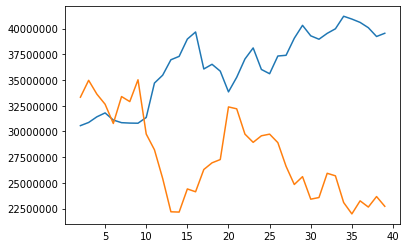

In [11]:
# line graph - did not use for slides
ax, fig1 = plt.subplots()
fig1.plot(dfslcpivot['weeknumber'], dfslcpivot['trips_2019'])
fig1.plot(dfslcpivot['weeknumber'], dfslcpivot['trips_2020'])
fig1.ticklabel_format(style='plain')


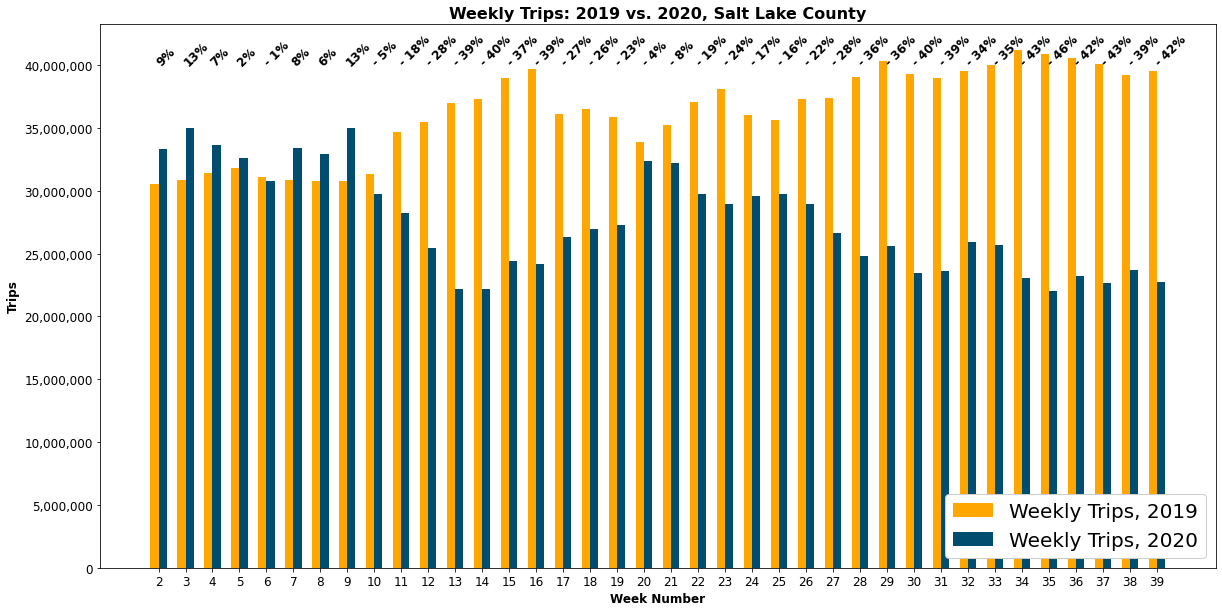

In [12]:
# Bar chart with multiple x's  - weekly trips 2019 vs 2020
plt.rcParams["figure.figsize"]=20,10
n = 38
weektrips19 = dfslcpivot['trips_2019'].to_list()
weektrips20 = dfslcpivot['trips_2020'].to_list()
weeknumbers = dfslcpivot['weeknumber'].to_list()

ind = np.arange(n) 
width = 0.3       
plt.bar(ind, weektrips19, width, label='Weekly Trips, 2019', color='#ffa600')
plt.bar(ind + width, weektrips20, width, label='Weekly Trips, 2020', color='#004d70')


#plt.rcParams["figure.figsize"]=20,10
plt.ticklabel_format(style='plain')
plt.ylabel('Trips', weight="bold", size=12)
plt.xlabel( 'Week Number', weight="bold", size=12)
plt.title('Weekly Trips: 2019 vs. 2020, Salt Lake County', weight="bold", size=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

i = 0
for p in ax.patches:
    percentageChangeText = str(int(((weektrips20[i] - weektrips19[i])/weektrips19[i]) *100)).replace("-","- ") + '%'
    width, height = p.get_width(), p.get_height()
    x=p.get_x() + width/2
    y=p.get_y()+40000000
    ax.annotate(percentageChangeText,(x,y), rotation = 45, weight="bold", size=12)
    i = i + 1
    if (i == n):
        break
    
plt.xticks(ind + width / 2, weeknumbers, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower right', fontsize = 20, framealpha=1)
plt.show()

In [13]:
# sum trips by distance values by month
slctripsbymonth_sum = dfslc.groupby(['month', 'year'], as_index=False)[['trips_1', 'trips_1_3', 'trips_3_5', 'trips_5_10',
       'trips_10_25', 'trips_25_50', 'trips_50_100', 'trips_100_250', 'trips_250_500', 'trips_500']].sum()
#slctripsbymonth_sum = slctripsbymonth_sum[(slctripsbyweek_sum['weeknumber']<40) & (slctripsbyweek_sum['weeknumber']>1)]
slctripsbymonth_sum["trips_100_500"] = slctripsbymonth_sum['trips_100_250']+slctripsbymonth_sum['trips_250_500']+slctripsbymonth_sum['trips_500']
slctripsbymonth_sum = slctripsbymonth_sum.drop(['trips_100_250', 'trips_250_500', 'trips_500'], axis=1)
slctripsbymonth_sum

,month,year,trips_1,trips_1_3,trips_3_5,trips_5_10,trips_10_25,trips_25_50,trips_50_100,trips_100_500
0,1,2019,35444669.0,34133021.0,17883829.0,22744366.0,18717359.0,4096902.0,1111899.0,2022129.0
1,1,2020,39481823.0,38154215.0,19869041.0,24664030.0,19191703.0,3831649.0,1083674.0,1476757.0
2,2,2019,31736236.0,30828342.0,16722243.0,21215080.0,17270457.0,3757981.0,1019608.0,1763204.0
3,2,2020,35194323.0,33879295.0,18059489.0,23184574.0,19064377.0,4129032.0,1230393.0,1957631.0
4,3,2019,38610992.0,38815810.0,20603085.0,25322925.0,20131706.0,4315295.0,1245737.0,2344510.0
5,3,2020,32438946.0,28073138.0,14222411.0,18692960.0,15556996.0,3580500.0,1329242.0,2061191.0
6,4,2019,40930665.0,43473889.0,22103479.0,27641603.0,20257204.0,4051320.0,1206223.0,2403692.0
7,4,2020,31970833.0,26275783.0,13064695.0,16191993.0,13044478.0,3154485.0,1092075.0,1410466.0
8,5,2019,37156077.0,42691907.0,22051303.0,27730046.0,21321459.0,4201246.0,1042553.0,1917836.0
9,5,2020,38042781.0,33983263.0,17172348.0,20610211.0,16150630.0,3777439.0,1439680.0,1735032.0


In [14]:
# test .loc function, drop first two columns
slctripsbymonth_sum.loc[16, :].values.tolist()[2:]

[40878682.0,
 43623369.0,
 22529491.0,
 30209096.0,
 25152077.0,
 5296906.0,
 1207866.0,
 1561344.0]

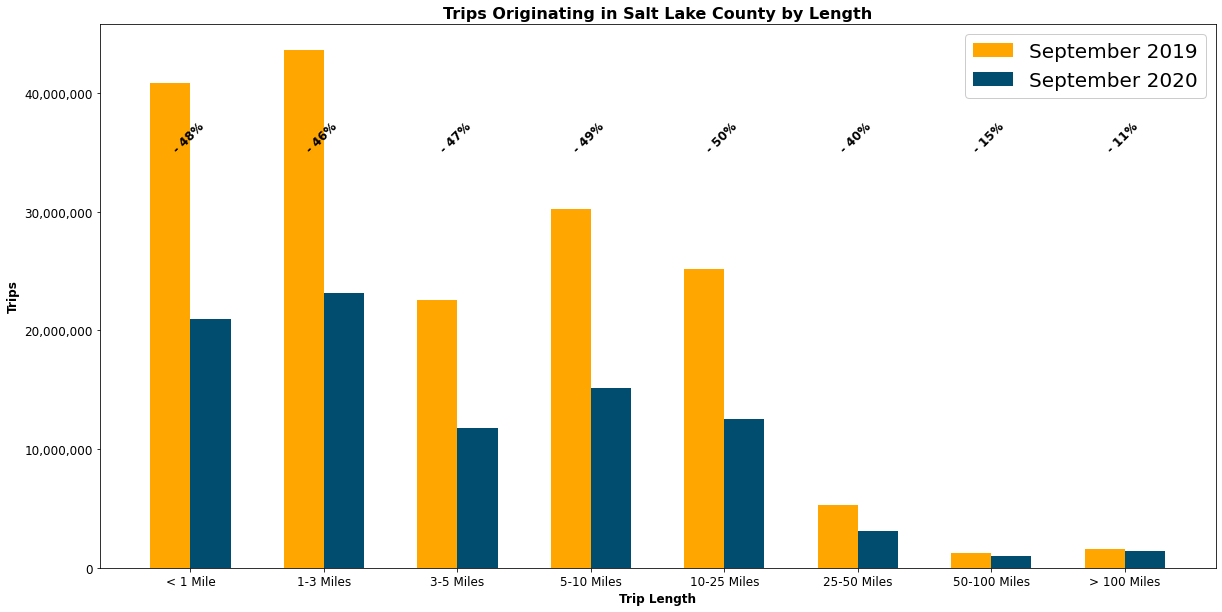

In [15]:
# bar chart - plot trips by distance for the month of septmeber for 2019 and 2020
plt.rcParams["figure.figsize"]=20,10
n = 8
monthtrips19 = slctripsbymonth_sum.loc[16, :].values.tolist()[2:]
monthtrips20 = slctripsbymonth_sum.loc[17, :].values.tolist()[2:]
triplengthlabels = ('< 1 Mile', '1-3 Miles', '3-5 Miles', '5-10 Miles',
       '10-25 Miles', '25-50 Miles', '50-100 Miles', '> 100 Miles')

ind = np.arange(n) 
width = 0.30       
plt.bar(ind, monthtrips19, width, label='September 2019', color='#ffa600')
plt.bar(ind + width, monthtrips20, width, label='September 2020', color='#004d70')

plt.rcParams["figure.figsize"]=20,10
plt.ticklabel_format(style='plain')
plt.ylabel('Trips', weight="bold", size=12)
plt.xlabel('Trip Length', weight="bold", size=12)
plt.title('Trips Originating in Salt Lake County by Length', weight="bold", size=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

i = 0
for p in ax.patches:
    percentageChangeText = str(int(((monthtrips20[i] - monthtrips19[i])/monthtrips19[i]) *100)).replace("-","- ") + '%'
    width, height = p.get_width(), p.get_height()
    x=p.get_x() + width/2
    y=p.get_y()+35000000
    ax.annotate(percentageChangeText,(x,y), rotation = 45, weight="bold", size=12)
    i = i + 1
    if (i == n):
        break
        
plt.xticks(ind + width / 2, triplengthlabels, fontsize='12')
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=20, framealpha=1)
plt.show()

In [16]:
# Do above as percentage of total trips for month of september
slctripsbymonth_sum2 = dfslc.groupby(['month', 'year'], as_index=False)[['trips','trips_1', 'trips_1_3', 'trips_3_5', 'trips_5_10',
       'trips_10_25', 'trips_25_50', 'trips_50_100', 'trips_100_250', 'trips_250_500', 'trips_500']].sum()
slctripsbymonth_sum2["trips_100_500"] = slctripsbymonth_sum2['trips_100_250']+slctripsbymonth_sum2['trips_250_500']+slctripsbymonth_sum2['trips_500']
slctripsbymonth_sum2 = slctripsbymonth_sum2.drop(['trips_100_250', 'trips_250_500', 'trips_500'], axis=1)

#add percent of total colums and calc
slctripsbymonth_sum2['pcnttrips_1'] = ((slctripsbymonth_sum2['trips_1']/slctripsbymonth_sum2['trips'])*100)
slctripsbymonth_sum2['pcnttrips_1_3'] = ((slctripsbymonth_sum2['trips_1_3']/slctripsbymonth_sum2['trips'])*100)
slctripsbymonth_sum2['pcnttrips_3_5'] = ((slctripsbymonth_sum2['trips_3_5']/slctripsbymonth_sum2['trips'])*100)
slctripsbymonth_sum2['pcnttrips_5_10'] = ((slctripsbymonth_sum2['trips_5_10']/slctripsbymonth_sum2['trips'])*100)
slctripsbymonth_sum2['pcnttrips_10_25'] = ((slctripsbymonth_sum2['trips_10_25']/slctripsbymonth_sum2['trips'])*100)
slctripsbymonth_sum2['pcnttrips_25_50'] = ((slctripsbymonth_sum2['trips_25_50']/slctripsbymonth_sum2['trips'])*100)
slctripsbymonth_sum2['pcnttrips_50_100'] = ((slctripsbymonth_sum2['trips_50_100']/slctripsbymonth_sum2['trips'])*100)
slctripsbymonth_sum2['pcnttrips_100_500'] = ((slctripsbymonth_sum2['trips_100_500']/slctripsbymonth_sum2['trips'])*100)
slctripsbymonth_sum2

,month,year,trips,trips_1,trips_1_3,trips_3_5,trips_5_10,trips_10_25,trips_25_50,trips_50_100,trips_100_500,pcnttrips_1,pcnttrips_1_3,pcnttrips_3_5,pcnttrips_5_10,pcnttrips_10_25,pcnttrips_25_50,pcnttrips_50_100,pcnttrips_100_500
0,1,2019,136154174.0,35444669.0,34133021.0,17883829.0,22744366.0,18717359.0,4096902.0,1111899.0,2022129.0,26.032745,25.069390,13.134984,16.704861,13.747180,3.009017,0.816647,1.485176
1,1,2020,147752892.0,39481823.0,38154215.0,19869041.0,24664030.0,19191703.0,3831649.0,1083674.0,1476757.0,26.721523,25.822990,13.447480,16.692756,12.989054,2.593282,0.733437,0.999478
2,2,2019,124313151.0,31736236.0,30828342.0,16722243.0,21215080.0,17270457.0,3757981.0,1019608.0,1763204.0,25.529267,24.798939,13.451709,17.065837,13.892703,3.022996,0.820193,1.418357
3,2,2020,136699114.0,35194323.0,33879295.0,18059489.0,23184574.0,19064377.0,4129032.0,1230393.0,1957631.0,25.745831,24.783844,13.211124,16.960296,13.946233,3.020526,0.900074,1.432073
4,3,2019,151390060.0,38610992.0,38815810.0,20603085.0,25322925.0,20131706.0,4315295.0,1245737.0,2344510.0,25.504311,25.639603,13.609272,16.726940,13.297905,2.850448,0.822866,1.548655
5,3,2020,115955384.0,32438946.0,28073138.0,14222411.0,18692960.0,15556996.0,3580500.0,1329242.0,2061191.0,27.975369,24.210293,12.265417,16.120821,13.416364,3.087826,1.146339,1.777572
6,4,2019,162068075.0,40930665.0,43473889.0,22103479.0,27641603.0,20257204.0,4051320.0,1206223.0,2403692.0,25.255230,26.824462,13.638392,17.055551,12.499195,2.499764,0.744269,1.483137
7,4,2020,106204808.0,31970833.0,26275783.0,13064695.0,16191993.0,13044478.0,3154485.0,1092075.0,1410466.0,30.103000,24.740672,12.301416,15.246008,12.282380,2.970190,1.028273,1.328062
8,5,2019,158112427.0,37156077.0,42691907.0,22051303.0,27730046.0,21321459.0,4201246.0,1042553.0,1917836.0,23.499783,27.000981,13.946597,17.538182,13.484999,2.657126,0.659374,1.212957
9,5,2020,132911384.0,38042781.0,33983263.0,17172348.0,20610211.0,16150630.0,3777439.0,1439680.0,1735032.0,28.622666,25.568361,12.920148,15.506731,12.151427,2.842073,1.083188,1.305405


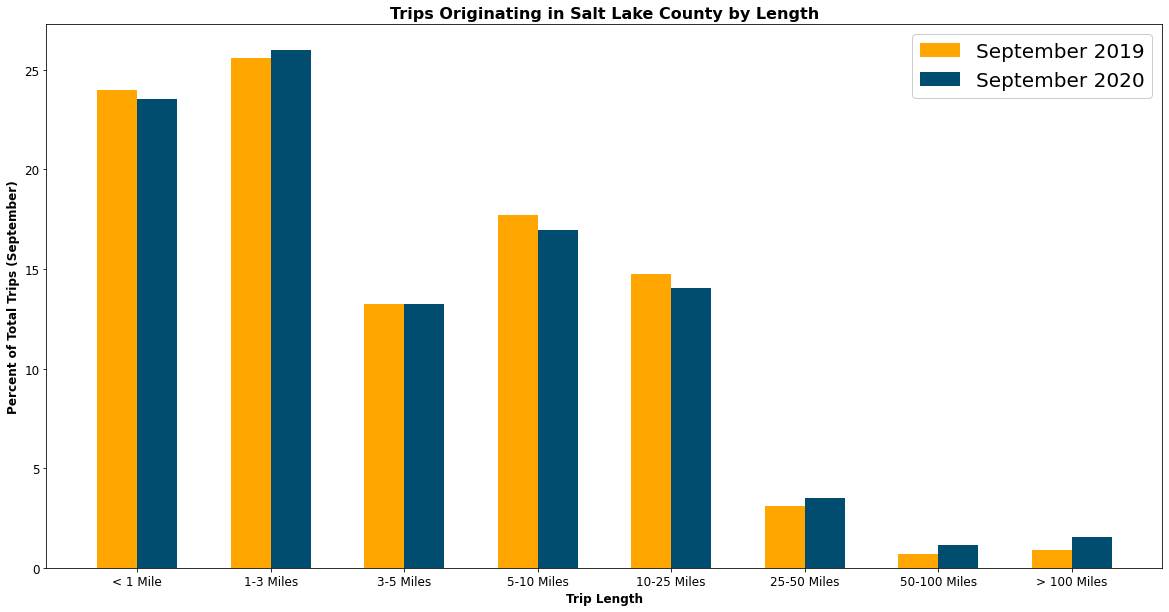

In [17]:
# plot September
plt.rcParams["figure.figsize"]=20,10
n = 8
monthtrips19 = slctripsbymonth_sum2.loc[16, :].values.tolist()[11:]
monthtrips20 = slctripsbymonth_sum2.loc[17, :].values.tolist()[11:]
triplengthlabels = ('< 1 Mile', '1-3 Miles', '3-5 Miles', '5-10 Miles',
       '10-25 Miles', '25-50 Miles', '50-100 Miles', '> 100 Miles')

ind = np.arange(n) 
width = 0.30       
plt.bar(ind, monthtrips19, width, label='September 2019', color='#ffa600')
plt.bar(ind + width, monthtrips20, width, label='September 2020', color='#004d70')

plt.rcParams["figure.figsize"]=20,10
plt.ticklabel_format(style='plain')
plt.ylabel('Percent of Total Trips (September)', weight="bold", size=12)
plt.xlabel('Trip Length', weight="bold", size=12)
plt.title('Trips Originating in Salt Lake County by Length', weight="bold", size=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# i = 0
# for p in ax.patches:
#     percentageChangeText = str(int(((monthtrips20[i] - monthtrips19[i])/monthtrips19[i]) *100)).replace("-","- ") + '%'
#     width, height = p.get_width(), p.get_height()
#     x=p.get_x() + width/2
#     y=p.get_y()+35000000
#     ax.annotate(percentageChangeText,(x,y), rotation = 45, weight="bold", size=12)
#     i = i + 1
#     if (i == n):
#         break
        
plt.xticks(ind + width / 2, triplengthlabels, fontsize='12')
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=20, framealpha=1)
plt.show()

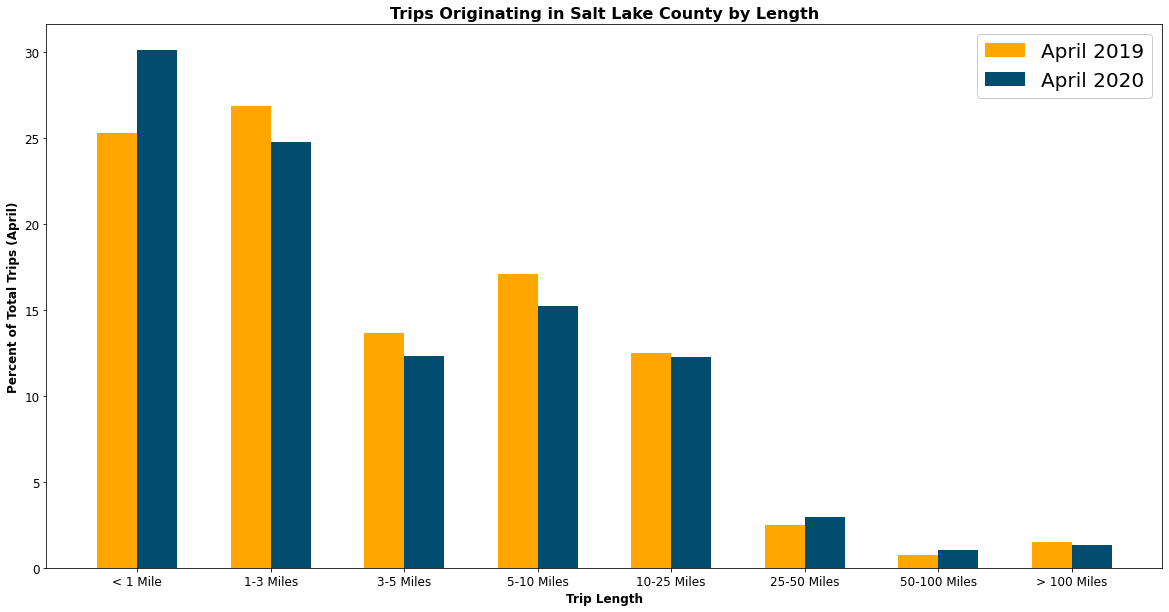

In [21]:
# plot April
plt.rcParams["figure.figsize"]=20,10
n = 8
monthtrips19 = slctripsbymonth_sum2.loc[6, :].values.tolist()[11:]
monthtrips20 = slctripsbymonth_sum2.loc[7, :].values.tolist()[11:]
triplengthlabels = ('< 1 Mile', '1-3 Miles', '3-5 Miles', '5-10 Miles',
       '10-25 Miles', '25-50 Miles', '50-100 Miles', '> 100 Miles')

ind = np.arange(n) 
width = 0.30       
plt.bar(ind, monthtrips19, width, label='April 2019', color='#ffa600')
plt.bar(ind + width, monthtrips20, width, label='April 2020', color='#004d70')

plt.rcParams["figure.figsize"]=20,10
plt.ticklabel_format(style='plain')
plt.ylabel('Percent of Total Trips (April)', weight="bold", size=12)
plt.xlabel('Trip Length', weight="bold", size=12)
plt.title('Trips Originating in Salt Lake County by Length', weight="bold", size=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# i = 0
# for p in ax.patches:
#     percentageChangeText = str(int(((monthtrips20[i] - monthtrips19[i])/monthtrips19[i]) *100)).replace("-","- ") + '%'
#     width, height = p.get_width(), p.get_height()
#     x=p.get_x() + width/2
#     y=p.get_y()+35000000
#     ax.annotate(percentageChangeText,(x,y), rotation = 45, weight="bold", size=12)
#     i = i + 1
#     if (i == n):
#         break
        
plt.xticks(ind + width / 2, triplengthlabels, fontsize='12')
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=20, framealpha=1)
plt.show()

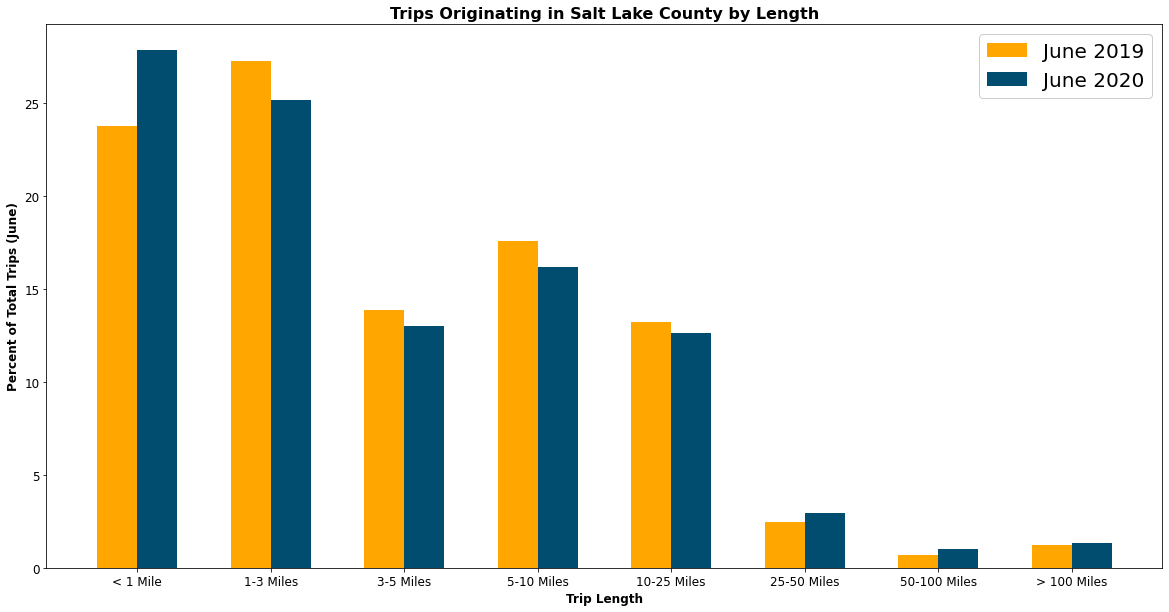

In [22]:
# plot June
plt.rcParams["figure.figsize"]=20,10
n = 8
monthtrips19 = slctripsbymonth_sum2.loc[10, :].values.tolist()[11:]
monthtrips20 = slctripsbymonth_sum2.loc[11, :].values.tolist()[11:]
triplengthlabels = ('< 1 Mile', '1-3 Miles', '3-5 Miles', '5-10 Miles',
       '10-25 Miles', '25-50 Miles', '50-100 Miles', '> 100 Miles')

ind = np.arange(n) 
width = 0.30       
plt.bar(ind, monthtrips19, width, label='June 2019', color='#ffa600')
plt.bar(ind + width, monthtrips20, width, label='June 2020', color='#004d70')

plt.rcParams["figure.figsize"]=20,10
plt.ticklabel_format(style='plain')
plt.ylabel('Percent of Total Trips (June)', weight="bold", size=12)
plt.xlabel('Trip Length', weight="bold", size=12)
plt.title('Trips Originating in Salt Lake County by Length', weight="bold", size=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# i = 0
# for p in ax.patches:
#     percentageChangeText = str(int(((monthtrips20[i] - monthtrips19[i])/monthtrips19[i]) *100)).replace("-","- ") + '%'
#     width, height = p.get_width(), p.get_height()
#     x=p.get_x() + width/2
#     y=p.get_y()+35000000
#     ax.annotate(percentageChangeText,(x,y), rotation = 45, weight="bold", size=12)
#     i = i + 1
#     if (i == n):
#         break
        
plt.xticks(ind + width / 2, triplengthlabels, fontsize='12')
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=20, framealpha=1)
plt.show()

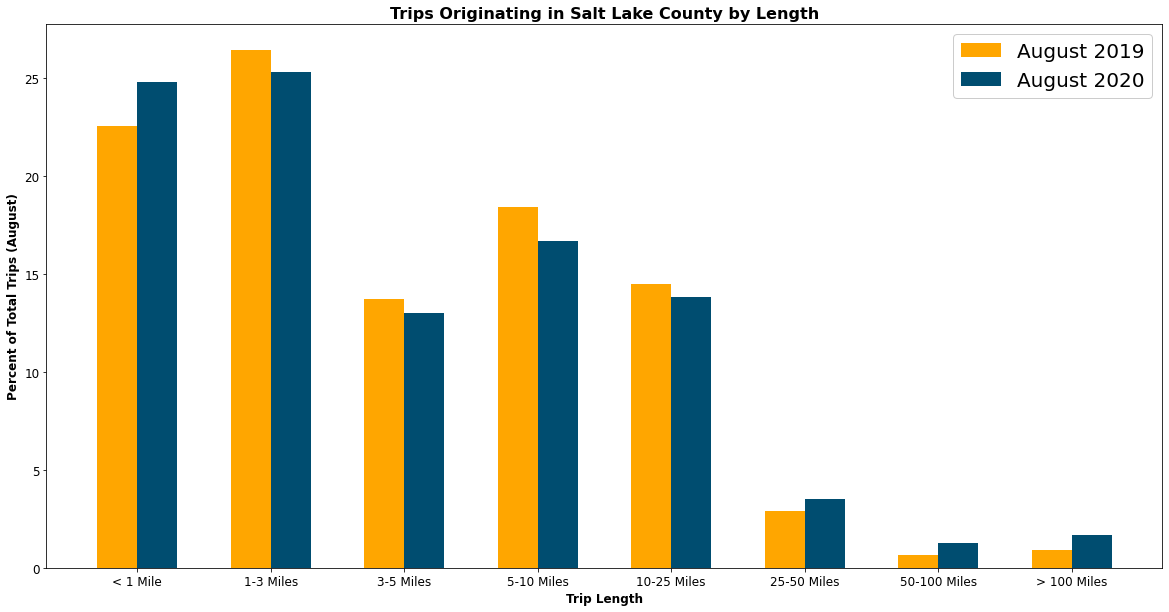

In [23]:
# plot August
plt.rcParams["figure.figsize"]=20,10
n = 8
monthtrips19 = slctripsbymonth_sum2.loc[14, :].values.tolist()[11:]
monthtrips20 = slctripsbymonth_sum2.loc[15, :].values.tolist()[11:]
triplengthlabels = ('< 1 Mile', '1-3 Miles', '3-5 Miles', '5-10 Miles',
       '10-25 Miles', '25-50 Miles', '50-100 Miles', '> 100 Miles')

ind = np.arange(n) 
width = 0.30       
plt.bar(ind, monthtrips19, width, label='August 2019', color='#ffa600')
plt.bar(ind + width, monthtrips20, width, label='August 2020', color='#004d70')

plt.rcParams["figure.figsize"]=20,10
plt.ticklabel_format(style='plain')
plt.ylabel('Percent of Total Trips (August)', weight="bold", size=12)
plt.xlabel('Trip Length', weight="bold", size=12)
plt.title('Trips Originating in Salt Lake County by Length', weight="bold", size=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# i = 0
# for p in ax.patches:
#     percentageChangeText = str(int(((monthtrips20[i] - monthtrips19[i])/monthtrips19[i]) *100)).replace("-","- ") + '%'
#     width, height = p.get_width(), p.get_height()
#     x=p.get_x() + width/2
#     y=p.get_y()+35000000
#     ax.annotate(percentageChangeText,(x,y), rotation = 45, weight="bold", size=12)
#     i = i + 1
#     if (i == n):
#         break
        
plt.xticks(ind + width / 2, triplengthlabels, fontsize='12')
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=20, framealpha=1)
plt.show()

In [18]:
# pop staying at home
# sum poptotal and popstayathome values by week
# filter down to weeks 2 - 39
# add new column and calculate percent
slcpcnthome_sum = dfslc.groupby(['weeknumber', 'year'], as_index=False)[['poptotal', 'pop_stay_at_home']].sum()
slcpcnthome_sum = slcpcnthome_sum[(slcpcnthome_sum['weeknumber']<40)& (slcpcnthome_sum['weeknumber']>1)]
slcpcnthome_sum["pcntstayhome"] = (slcpcnthome_sum["pop_stay_at_home"]/slcpcnthome_sum["poptotal"])*100
slcpcnthome_sum

,weeknumber,year,poptotal,pop_stay_at_home,pcntstayhome
2,2,2019,8043770.0,1565172.0,19.458189
3,2,2020,8068431.0,1690477.0,20.951744
4,3,2019,8043770.0,1544316.0,19.198908
5,3,2020,8068431.0,1665971.0,20.648017
6,4,2019,8043770.0,1579868.0,19.640890
...,...,...,...,...,...
73,37,2020,8068431.0,2322477.0,28.784741
74,38,2019,8043770.0,1567976.0,19.493049
75,38,2020,8068431.0,2310135.0,28.631775
76,39,2019,8043770.0,1637463.0,20.356910


In [19]:
# filter 2019 and 2020 observations and save to variables - then merge into a table with weeknumber
# we did this so we could graph multiple x values - compare 2019 and 2020 population
weeknumbers = slcpcnthome_sum[['weeknumber']].drop_duplicates()
dfpop2019 = slcpcnthome_sum[slcpcnthome_sum['year']==2019]
dfpop2019.columns = ['weeknumber', 'year', 'poptotal2019', 'pop_stay_at_home_2019', 'pcntstayhome2019']
dfpop2020 = slcpcnthome_sum[slcpcnthome_sum['year']==2020]
dfpop2020.columns = ['weeknumber', 'year', 'poptotal2020', 'pop_stay_at_home_2020', 'pcntstayhome2020']
dfslcpoppivot = weeknumbers.merge(dfpop2019.drop(['year'], axis = 1), left_on = 'weeknumber', right_on = 'weeknumber', how = 'inner')
dfslcpoppivot = dfslcpoppivot.merge(dfpop2020.drop(['year'], axis = 1), left_on = 'weeknumber', right_on = 'weeknumber', how = 'inner')
dfslcpoppivot

,weeknumber,poptotal2019,pop_stay_at_home_2019,pcntstayhome2019,poptotal2020,pop_stay_at_home_2020,pcntstayhome2020
0,2,8043770.0,1565172.0,19.458189,8068431.0,1690477.0,20.951744
1,3,8043770.0,1544316.0,19.198908,8068431.0,1665971.0,20.648017
2,4,8043770.0,1579868.0,19.640890,8068431.0,1681233.0,20.837174
3,5,8043770.0,1558505.0,19.375305,8068431.0,1608631.0,19.937346
4,6,8043770.0,1577572.0,19.612346,8068431.0,1677838.0,20.795096
5,7,8043770.0,1544296.0,19.198659,8068431.0,1569180.0,19.448391
6,8,8043770.0,1610933.0,20.027089,8068431.0,1645118.0,20.389565
7,9,8043770.0,1610709.0,20.024305,8068431.0,1619443.0,20.071350
8,10,8043770.0,1628653.0,20.247384,8068431.0,1628941.0,20.189068
9,11,8043770.0,1594506.0,19.822869,8068431.0,1691968.0,20.970223


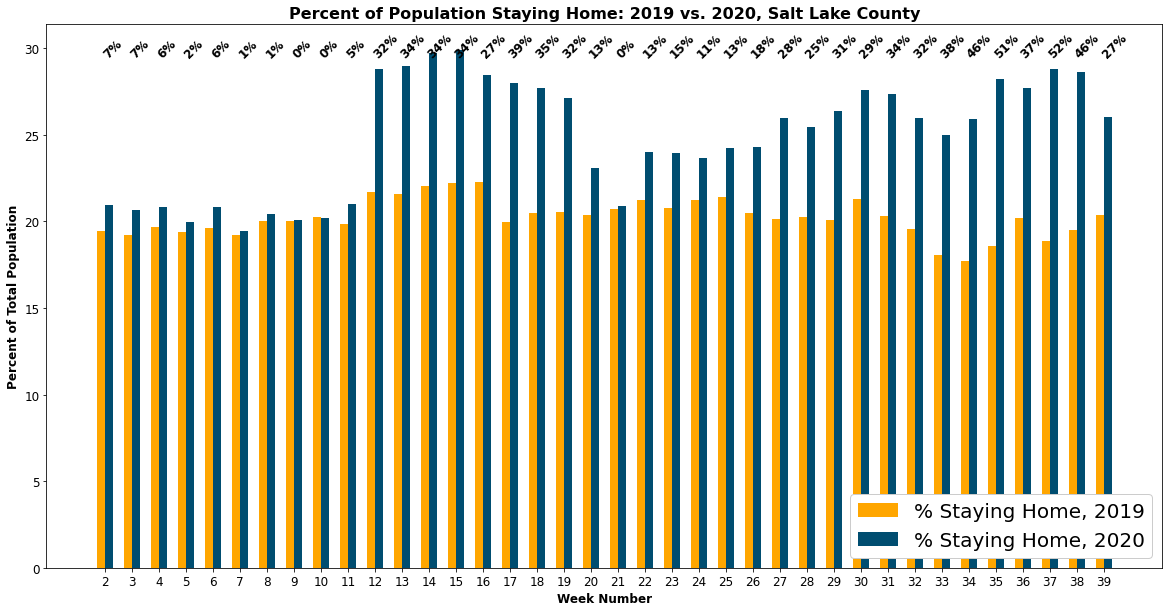

In [20]:
# bar chart - multiple x's 
plt.rcParams["figure.figsize"]=20,10
n = 38
pcntstayhome2019 = dfslcpoppivot['pcntstayhome2019'].to_list()
pcntstayhome2020 = dfslcpoppivot['pcntstayhome2020'].to_list()
weeknumbers = dfslcpoppivot['weeknumber'].to_list()

ind = np.arange(n) 
width = 0.3       
plt.bar(ind, pcntstayhome2019, width, label='% Staying Home, 2019', color='#ffa600')
plt.bar(ind + width, pcntstayhome2020, width, label='% Staying Home, 2020', color='#004d70')

#plt.rcParams["figure.figsize"]=20,10
plt.ticklabel_format(style='plain')
plt.ylabel('Percent of Total Population', weight="bold", size=12)
plt.xlabel('Week Number', weight="bold", size=12)
plt.title('Percent of Population Staying Home: 2019 vs. 2020, Salt Lake County', weight="bold", size=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

i = 0
for p in ax.patches:
    percentageChangeText = str(int(((pcntstayhome2020[i] - pcntstayhome2019[i])/pcntstayhome2019[i])*100)).replace("-","- ") + '%'
    width, height = p.get_width(), p.get_height()
    x=p.get_x() + width/2
    y=p.get_y()+29.5
    ax.annotate(percentageChangeText,(x,y), rotation = 45, weight="bold", size=12)
    i = i + 1
    if (i == n):
        break
    
plt.xticks(ind + width / 2, weeknumbers, size=12)
plt.yticks(size=12)
plt.legend(loc='lower right', fontsize=20, framealpha=1)
plt.show()
#plt.savefig(".\\saltlake_pcntpopstayinghome.png")